In [63]:
# import libraries

import pandas as pd #data cleaning, preparation, and transformation, as well as exploratory data analysis (EDA) and basic statistical analysis.
import seaborn as sns #useful for creating complex and aesthetically pleasing visualizations
import numpy as np

import matplotlib #visualization tool, plots are graphical representations of data
import matplotlib.pyplot as plt
plt.style.use('ggplot') # sets plt to ggplot which is a import pandas as aesthetically pleasing style
from matplotlib.pyplot import figure #imports figure function used to create new figures for a plot

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create


#read in the data

df= pd.read_csv(r'C:\Users\eriik\Documents\python projects\movies.csv') ##reading the file

#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [64]:
print(df['budget'].isnull().sum())
print(df['gross'].isnull().sum())

2171
189


In [65]:
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)

In [66]:
print(df['budget'].isnull().sum())
print(df['gross'].isnull().sum())

0
0


In [69]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [70]:
# checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())## looking for 
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [71]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [72]:
#creating a new column called 'year_modified' taking until the 4th space from column 'released' converted into string 
df['year_modified']= df['released'].astype(str).str[:32]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)"


In [73]:
#order by 'gross' revenue
df= df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)"


In [74]:
##Check for duplicates and drop them 

df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)"


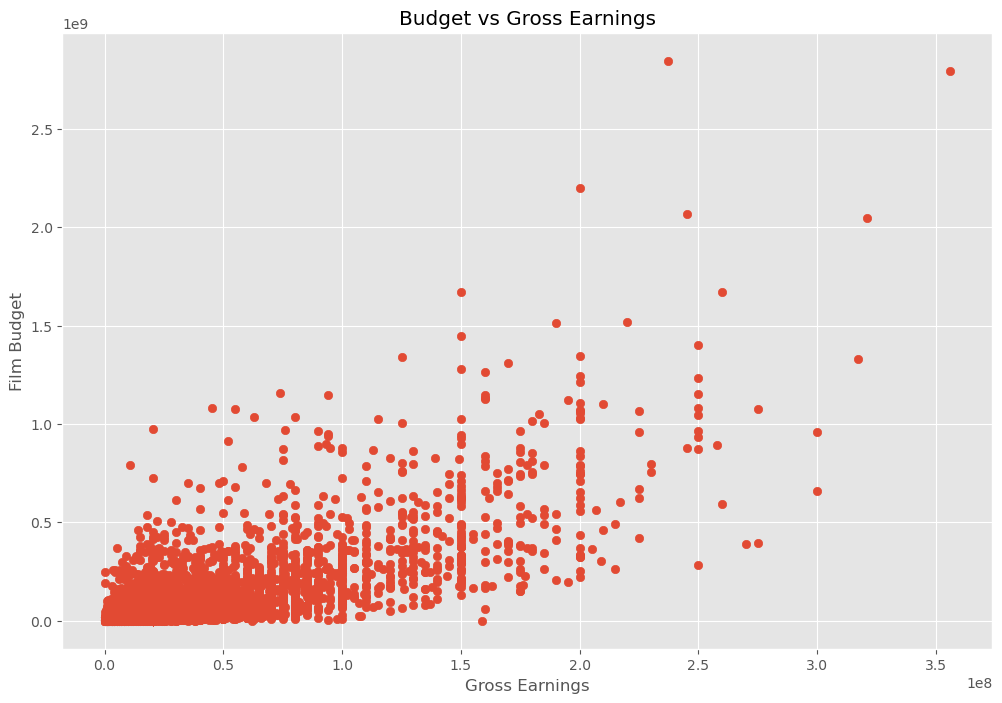

In [75]:
##correlation - High investment likely high revenue
#building a scatter plot with budget vs gross

plt.scatter(x = df['budget'], y= df['gross'])
plt.title ('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

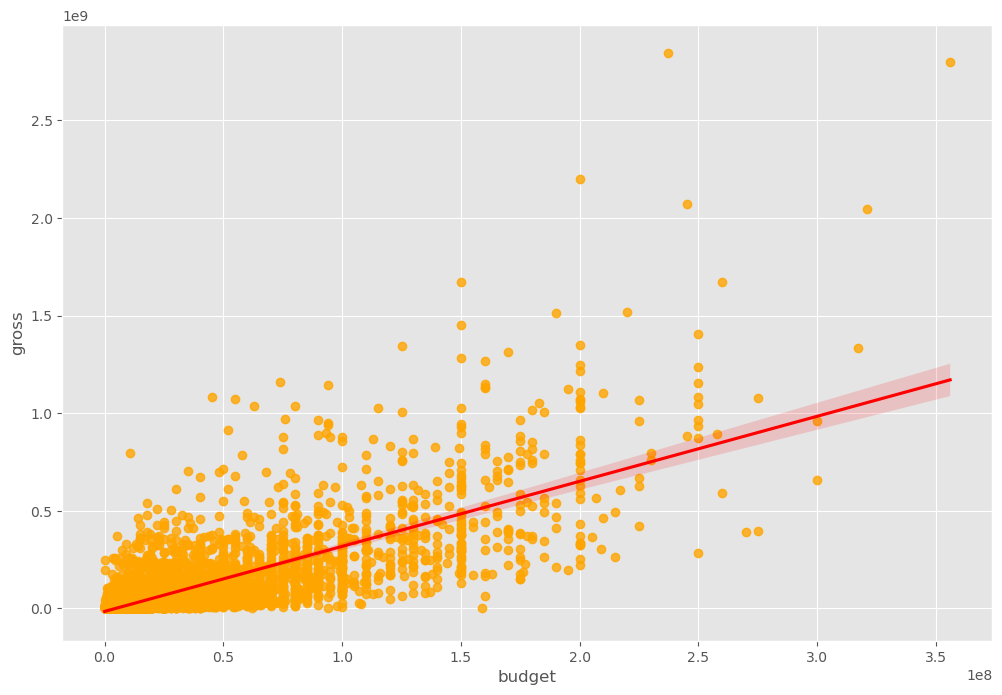

In [24]:
## creating a regression plot, using seaborn

sns.regplot(x='budget' , y='gross', data = df, scatter_kws={"color":"orange"}, line_kws={"color":"red"})

In [26]:
## What is the correlation value,
df.corr(method='pearson') ## only works with numeric fields, using pearson method, data is continuos and normally distributed

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


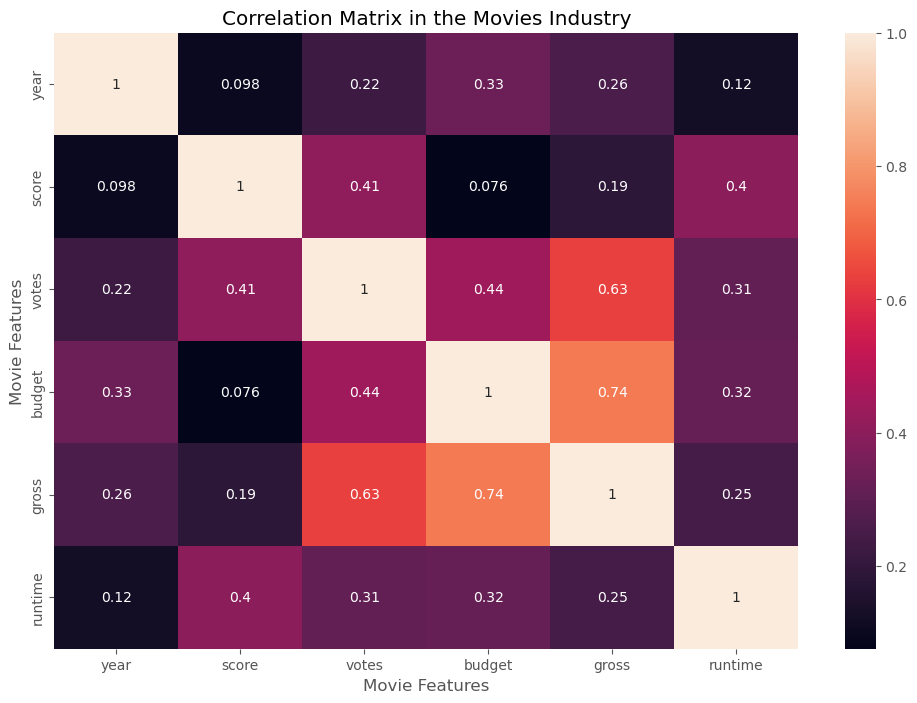

In [28]:
# creating a plot for the correlation_matrix
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix in the Movies Industry')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_modified
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)"


Text(0, 0.5, 'Gross Revenue')

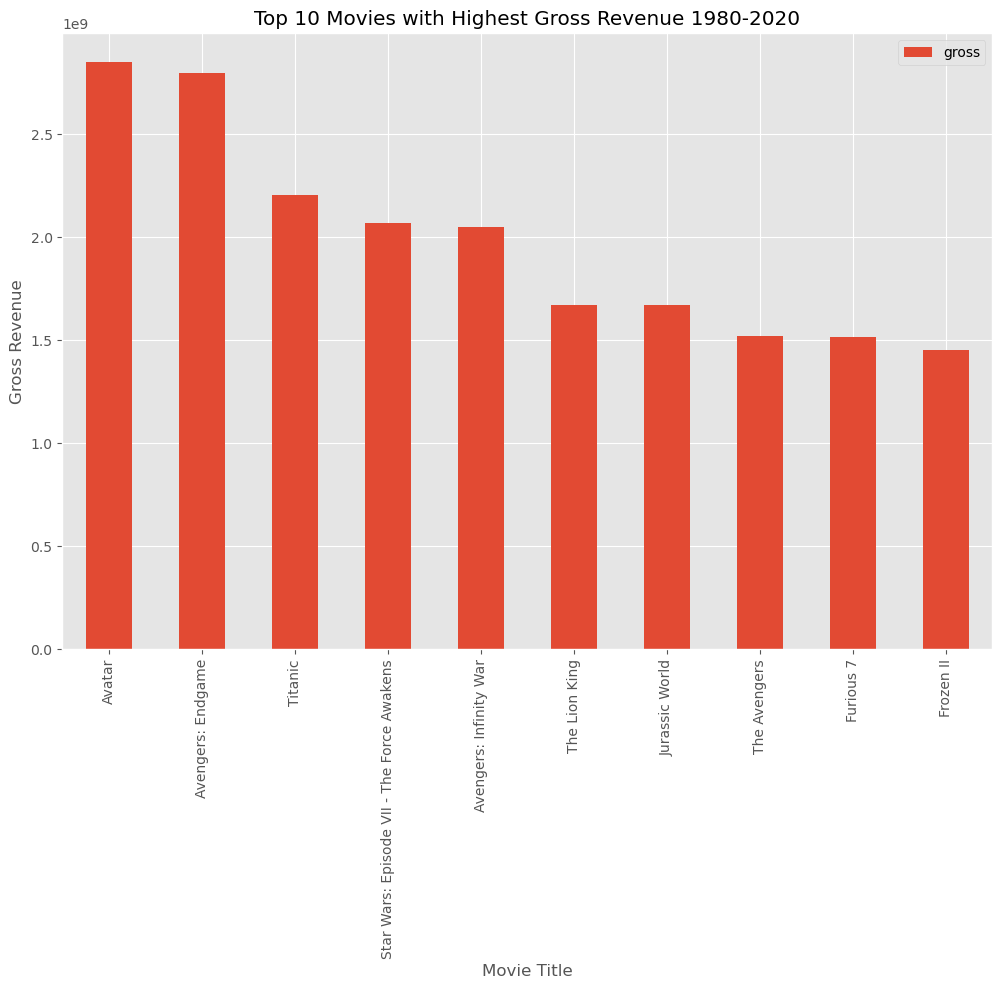

In [82]:
top_10 = df.sort_values(by='gross', ascending=False).head(10)
top_10.plot(x='name', y='gross', kind='bar')
plt.title('Top 10 Movies with Highest Gross Revenue 1980-2020')
plt.xlabel('Movie Title')
plt.ylabel('Gross Revenue')

Text(0, 0.5, 'Budget')

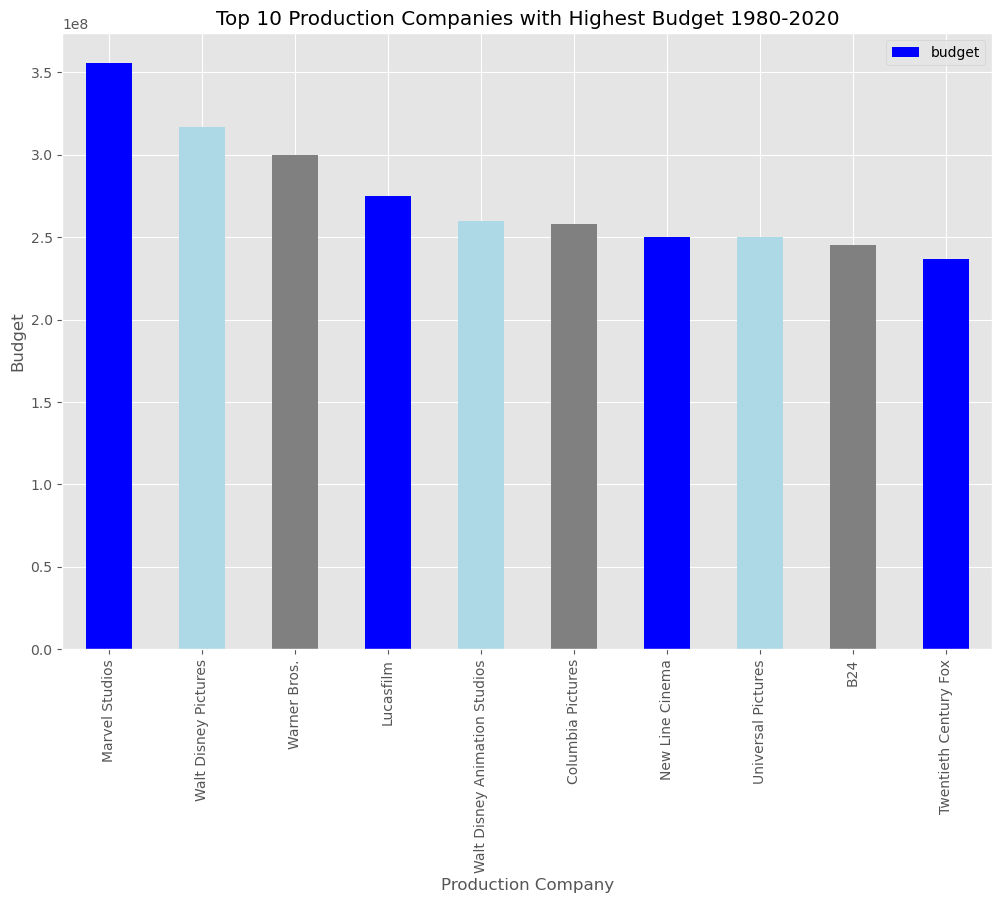

In [86]:
# Create a new dataframe with unique company names and their maximum budget value
max_budgets = df.groupby('company')['budget'].max().reset_index()

# Sort the dataframe by maximum budget in descending order and select the top 10 companies
top_10 = max_budgets.sort_values(by='budget', ascending=False).head(10)

# Plot the top 10 production companies with the highest budget
top_10.plot(x='company', y='budget', kind='bar', color=['blue','lightblue','grey'] )
plt.title('Top 10 Production Companies with Highest Budget 1980-2020')
plt.xlabel('Production Company')
plt.ylabel('Budget')

Text(0, 0.5, 'Gross Revenue')

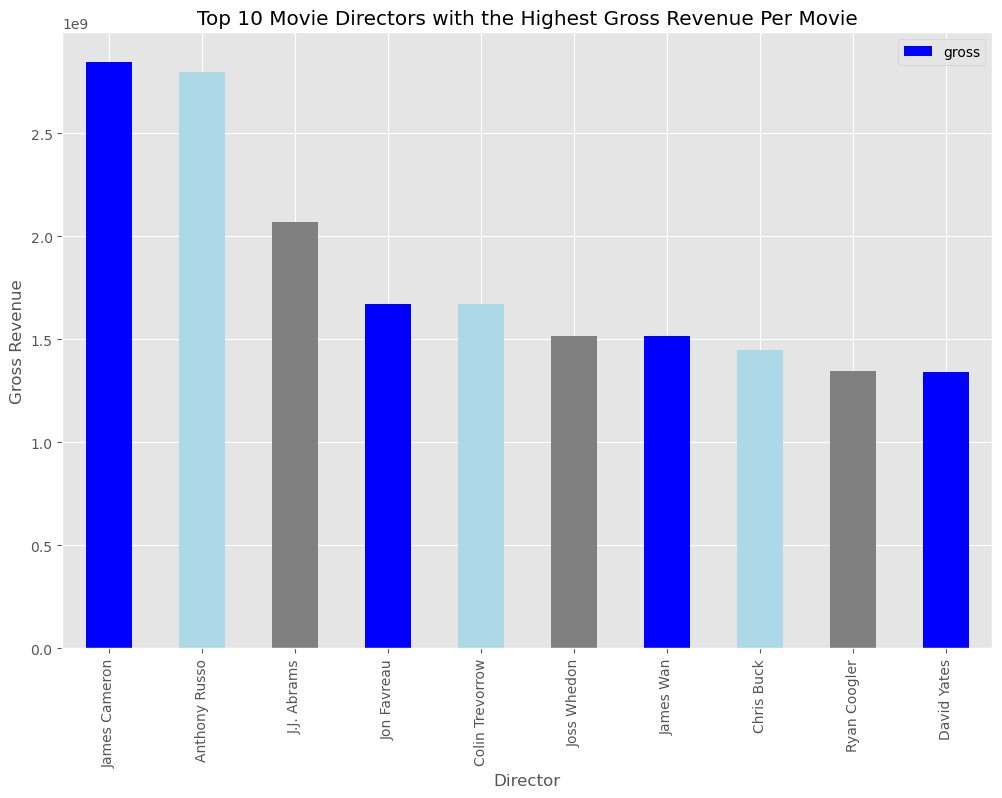

In [88]:
# Create a new dataframe with unique company names and their maximum budget value
max_revenue = df.groupby('director')['gross'].max().reset_index()

# Sort the dataframe by maximum budget in descending order and select the top 10 companies
top_10 = max_revenue.sort_values(by='gross', ascending=False).head(10)

# Plot the top 10 production companies with the highest budget
top_10.plot(x='director', y='gross', kind='bar', color=['blue','lightblue','grey'] )
plt.title('Top 10 Movie Directors with the Highest Gross Revenue Per Movie')
plt.xlabel('Director')
plt.ylabel('Gross Revenue')

Text(0, 0.5, 'Gross Revenue')

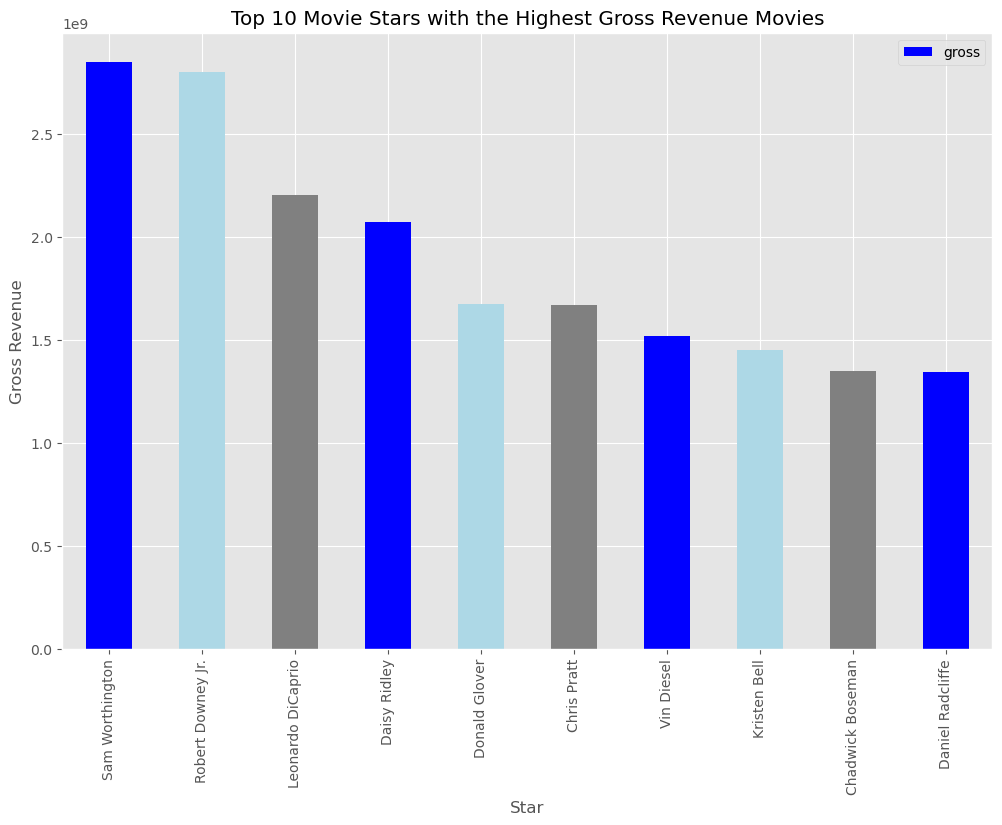

In [90]:
# Create a new dataframe with unique company names and their maximum budget value
max_star_rev = df.groupby('star')['gross'].max().reset_index()

# Sort the dataframe by maximum budget in descending order and select the top 10 companies
top_10 = max_star_rev.sort_values(by='gross', ascending=False).head(10)

# Plot the top 10 production companies with the highest budget
top_10.plot(x='star', y='gross', kind='bar', color=['blue','lightblue','grey'] )
plt.title('Top 10 Movie Stars with the Highest Gross Revenue Movies')
plt.xlabel('Star')
plt.ylabel('Gross Revenue')